**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

# *Identifying the best approach for music genre classification on an imbalanced dataset* 

## Abstract

This project uses prior learned knowledge of machine and deep learning basic principles and algorithms, to train and test various models on a given dataset, in order to attempt achieving the highest percentage of Accuracy and Logistic Loss of identifying the music genre of songs (later on: labels). Although the training data set was imbalanced, multiple training, and data cleaning methods (such as K-nearest-neighbour, Logistic Regression, SVM, Neural Network, standard scaling, and normalization) were deployed in order to formulate the optimized model for the accuracy of the labels.  A parametric search alongside Brute Force was also done on the data to remove redundant features before we finally identified __Logistic Regression__ providing the best accuracy, logistic loss and F1_score. After training the algorithm on the test data, an accuracy percentage of __0.67345__ and a Log Loss of __0.16651__ has been achieved.

## 1. Introduction

Being at the forefront of many discussions today in the world of ML & AI, Music has gained a new technical interest with many algorithms and smart systems allowing users to find similar artists to those to whom they already listen to. [1] Companies such as Spotify and Apple Music, are putting these in place for their streaming services to ensure that their users can get  the most tailored playlist of what the companies can offer. [2]

In order to gain a better understanding of what type of music the user is playing, the user's playlist data must be analyzed. As the user may be listening to various types of music, the genre is determined to help narrow down other similar artists with the same styles. 

For this project, our main goal was to try to use various ML techniques and algorithms learned from earlier exercises and quizzes, with some outside research backing up our approach, in order to further dissect the training dataset that was given. Using our classifier, we aim to identify the music genre of songs to the highest accuracy possible. 

In [ ]:
# Run this cell if you have any missing libraries
!pip3 install matplotlib scikit-learn numpy pandas imblearn

In [5]:
# Import libraries that will be used in the project
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import itertools

In [6]:
# Load the data and cleanup
train_data_path = "train_data.csv"
labels_path = "train_labels.csv"
test_data_path = "test_data.csv"
train_data_with_headers_path = "train_data_with_headers.csv"

genres_labels = np.array(pd.read_csv(labels_path, index_col=False, header=None))
training_data_set = np.array(pd.read_csv(train_data_path, index_col=False, header=None))
training_data_set_with_headers = pd.read_csv(train_data_with_headers_path, index_col=False)

genres_labels = genres_labels.reshape((genres_labels.shape[0],))
genres = range(1, 11)

## 2. Data analysis

As mentioned above, we were given a data set to work with that was further divided into two separate data sets. One is that of a data set with 4363 songs, and the other is that of a test data set with 6544 songs. Within these data sets, there are 10 variations of different labels given to the songs that are in parallel with that of their genre. The 10 labels are broken down into the following:

<ol>
    <li>'Pop_Rock' </li>
    <li>'Electronic' </li>
    <li>'Rap' </li>
    <li>'Jazz' </li>
    <li>'Latin' </li>
    <li>'RnB' </li>
    <li>'International' </li>
    <li>'Country' </li>
    <li>'Reggae' </li>
    <li>'Blues'</li>
</ol>

If we are to look at the data within a histogram (__Figure 1.__), we can see that there is clearly an imbalance within the class distribution favouring that if the first label ‘Pop_Rock’.  The final feature vector of each song consists of 264 dimensions: 168 values for the rhythm patterns (24 bands, 7 statistics), 48 values for the chroma (12 bands, 4 statistics), and 48 values for the MFCCs (12 bands, 4 statistics).

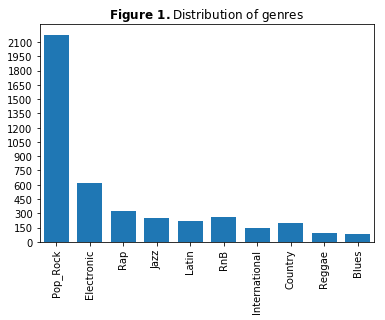

In [7]:
# Plot histogram
genres_names = ['Pop_Rock',
          'Electronic',
          'Rap',
          'Jazz',
          'Latin',
          'RnB',
          'International',
          'Country',
          'Reggae',
          'Blues']

plt.figure(1)
plt.title(r"$\bf{Figure\ 1.}$Distribution of genres")
original_bins = np.arange(1, 12) - 0.5
counts, bins, patches = plt.hist(genres_labels, bins=original_bins, rwidth=0.75)
plt.xticks(range(1, 11), genres_names, rotation='vertical')
plt.yticks(np.arange(0, np.max(counts), 150))
plt.xlim([0.5, 10.5])
plt.show()

In [8]:
# Plot first 5 rows to see the features
display(HTML(training_data_set_with_headers.head(5).to_html(max_rows=5)))

,rythym_mean_band1,rythym_mean_band2,rythym_mean_band3,rythym_mean_band4,rythym_mean_band5,rythym_mean_band6,rythym_mean_band7,rythym_mean_band8,rythym_mean_band9,rythym_mean_band10,rythym_mean_band11,rythym_mean_band12,rythym_mean_band13,rythym_mean_band14,rythym_mean_band15,rythym_mean_band16,rythym_mean_band17,rythym_mean_band18,rythym_mean_band19,rythym_mean_band20,rythym_mean_band21,rythym_mean_band22,rythym_mean_band23,rythym_mean_band24,rythym_med_band1,rythym_med_band2,rythym_med_band3,rythym_med_band4,rythym_med_band5,rythym_med_band6,rythym_med_band7,rythym_med_band8,rythym_med_band9,rythym_med_band10,rythym_med_band11,rythym_med_band12,rythym_med_band13,rythym_med_band14,rythym_med_band15,rythym_med_band16,rythym_med_band17,rythym_med_band18,rythym_med_band19,rythym_med_band20,rythym_med_band21,rythym_med_band22,rythym_med_band23,rythym_med_band24,rythym_var_band1,rythym_var_band2,rythym_var_band3,rythym_var_band4,rythym_var_band5,rythym_var_band6,rythym_var_band7,rythym_var_band8,rythym_var_band9,rythym_var_band10,rythym_var_band11,rythym_var_band12,rythym_var_band13,rythym_var_band14,rythym_var_band15,rythym_var_band16,rythym_var_band17,rythym_var_band18,rythym_var_band19,rythym_var_band20,rythym_var_band21,rythym_var_band22,rythym_var_band23,rythym_var_band24,rythym_kurtosis_band1,rythym_kurtosis_band2,rythym_kurtosis_band3,rythym_kurtosis_band4,rythym_kurtosis_band5,rythym_kurtosis_band6,rythym_kurtosis_band7,rythym_kurtosis_band8,rythym_kurtosis_band9,rythym_kurtosis_band10,rythym_kurtosis_band11,rythym_kurtosis_band12,rythym_kurtosis_band13,rythym_kurtosis_band14,rythym_kurtosis_band15,rythym_kurtosis_band16,rythym_kurtosis_band17,rythym_kurtosis_band18,rythym_kurtosis_band19,rythym_kurtosis_band20,rythym_kurtosis_band21,rythym_kurtosis_band22,rythym_kurtosis_band23,rythym_kurtosis_band24,rythym_skewness_band1,rythym_skewness_band2,rythym_skewness_band3,rythym_skewness_band4,rythym_skewness_band5,rythym_skewness_band6,rythym_skewness_band7,rythym_skewness_band8,rythym_skewness_band9,rythym_skewness_band10,rythym_skewness_band11,rythym_skewness_band12,rythym_skewness_band13,rythym_skewness_band14,rythym_skewness_band15,rythym_skewness_band16,rythym_skewness_band17,rythym_skewness_band18,rythym_skewness_band19,rythym_skewness_band20,rythym_skewness_band21,rythym_skewness_band22,rythym_skewness_band23,rythym_skewness_band24,rythym_min_band1,rythym_min_band2,rythym_min_band3,rythym_min_band4,rythym_min_band5,rythym_min_band6,rythym_min_band7,rythym_min_band8,rythym_min_band9,rythym_min_band10,rythym_min_band11,rythym_min_band12,rythym_min_band13,rythym_min_band14,rythym_min_band15,rythym_min_band16,rythym_min_band17,rythym_min_band18,rythym_min_band19,rythym_min_band20,rythym_min_band21,rythym_min_band22,rythym_min_band23,rythym_min_band24,rythym_max_band1,rythym_max_band2,rythym_max_band3,rythym_max_band4,rythym_max_band5,rythym_max_band6,rythym_max_band7,rythym_max_band8,rythym_max_band9,rythym_max_band10,rythym_max_band11,rythym_max_band12,rythym_max_band13,rythym_max_band14,rythym_max_band15,rythym_max_band16,rythym_max_band17,rythym_max_band18,rythym_max_band19,rythym_max_band20,rythym_max_band21,rythym_max_band22,rythym_max_band23,rythym_max_band24,chroma_mean_pitch1,chroma_mean_pitch2,chroma_mean_pitch3,chroma_mean_pitch4,chroma_mean_pitch5,chroma_mean_pitch6,chroma_mean_pitch7,chroma_mean_pitch8,chroma_mean_pitch9,chroma_mean_pitch10,chroma_mean_pitch11,chroma_mean_pitch12,chroma_std_pitch1,chroma_std_pitch2,chroma_std_pitch3,chroma_std_pitch4,chroma_std_pitch5,chroma_std_pitch6,chroma_std_pitch7,chroma_std_pitch8,chroma_std_pitch9,chroma_std_pitch10,chroma_std_pitch11,chroma_std_pitch12,chroma_min_pitch1,chroma_min_pitch2,chroma_min_pitch3,chroma_min_pitch4,chroma_min_pitch5,chroma_min_pitch6,chroma_min_pitch7,chroma_min_pitch8,chroma_min_pitch9,chroma_min_pitch10,chroma_min_pitch11,chroma_min_pitch12,chroma_max_pitch1,chroma_max_pitch2,chroma_max_pitch3,chroma_max_pitch4,chroma_max_pitch5,chroma_max_pitc

As there are so many dimensions within the feature vector of each song, it is hard to comprehend what are the most important values (rhythm patterns, chroma or MFCCs). Once one is able to classify the most important features for each portion, they will be able to remove unrelated data resulting in an optimized data set. 

Attempting to gain a better visual representation (__Figure 2__) of the data alongside each other, we separated each label (1-10) and plotted the representation of each class using Principal Component Analysis (PCA), in order to see if there are outliers. 

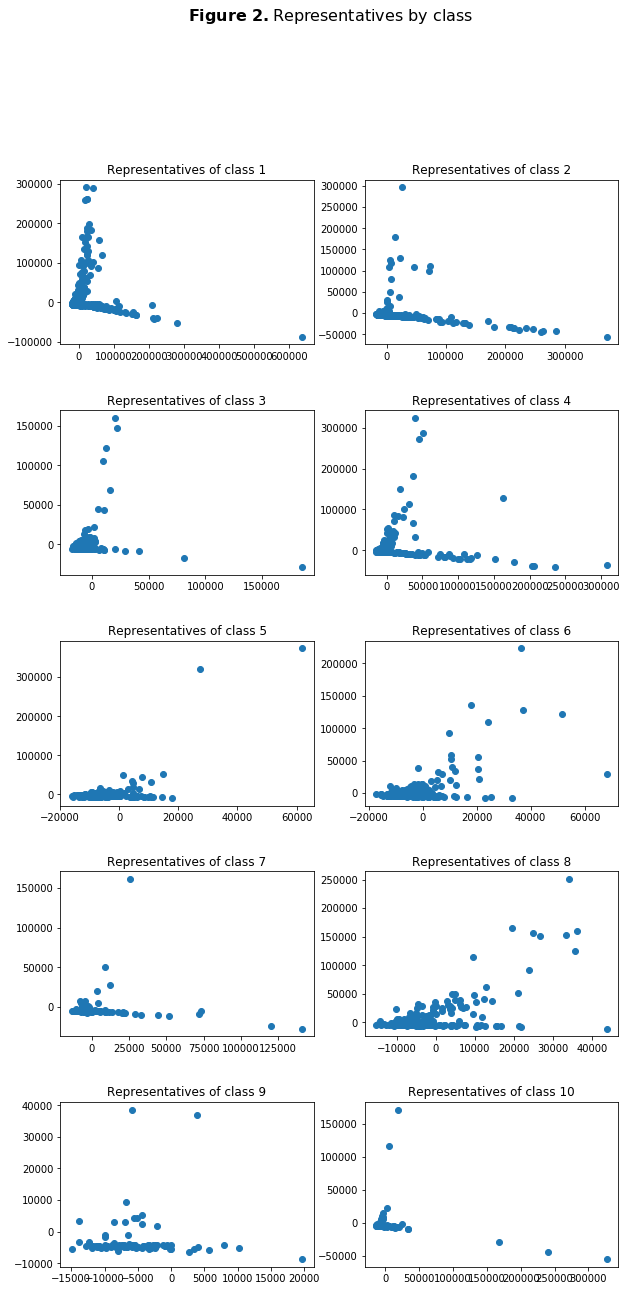

In [9]:
pca = PCA(2)
training_data_set_for_class_representation = pca.fit_transform(training_data_set, genres_labels)

fig = plt.figure(2, figsize=(10, 20))
fig.suptitle(r"$\bf{Figure\ 2.}$Representatives by class", fontsize=16, y=1)
fig.tight_layout(rect=[0, 0.03, -1, 0.95])
for i in genres:
    plt.subplot(5, 2, i)
    i_th_label = np.where(genres_labels == i)[0]
    i_th_data = training_data_set_for_class_representation[i_th_label]
    plt.title("Representatives of class {}".format(i))
    plt.scatter(i_th_data[:, 0], i_th_data[:, 1], )
plt.subplots_adjust(hspace=0.4)
plt.show()

## 3. Methods and experiments

When first beginning to read the instructions for this data analysis project, many ideas and angels came to our minds in how to identify the music genre of songs with the data that was given. Below you can see a diagram of our thought process in numerical line order with a legend for further description. The numbered order with further detail can also be found in the latter part of this section. 
 
__Legend for the block diagram__
 
__Colours of blocks:__
- _Green_ =  are those of the data (training and testing). 
- _Blue_ =  are those ideas that we ended up using in order to obtain the results talked about in the next section. 
- _Red_ =  are ideas and experimental sections that either didn’t result in a change or simply just didn’t work with our other sections of implementation.  
 
__Line Indications:__
- _Solid_ = Path taken to carry on with the next step in the implementation 
- _Dashed_ = Path taken in order to revert back to an already implemented function 


![Figure 3. Block diagram of our development process](block_diagram4.png)
<center><p><b>Figure 3.</b> Block diagram of development process.</p></center>

Firstly, we took the Training Dataset given to us and broke it down into two smaller data sets; one containing 75% of the data for training purposes and the other 25% for that of testing. 
 
__K-Nearest Neighbour:__ As mentioned above, the data given to us has an imbalance within the class distribution that if the first label ‘Pop_Rock’.  Due to this, we tried to the data with the  K-Nearest Neighbour (KNN) algorithm. This resulted in pretty decent results nearing 55% accuracy.
 
__SMOTE (1):__  We tried to increase this accuracy percentage by applying the SMOTE algorithm. 
Knowing that the data set was imbalanced, we came across this article [3] and thought that we would give it a shot, in order to help balance out the data with that data that was underrepresented in the set. After looking that the numbers that it produced and noticing that it wouldn’t be helpful to improve the accuracy.
 
__Neural Network:__ Thinking back to the deep learning portion of the course, we tried to implement them Neural Network algorithm, as SMOTE wasn't promising, Even though the algorithms of deep learning are usually a little more accurate and helpful with imbalanced datasets, there was still no improvement as there just was simply not enough data, we chose to scrap that idea as well and return to our idea of KNN. 
 
__Logistic Regression:__ As it seemed too easy to only use KNN to try to solve this problem, we reverted to our original idea of Logistic Regression (LR). We didn’t try this at first, as it was suggested in the Slack channel that it offered poor results. With the initial deploy, we were able to gain a 63.5%. 
 
__Principal Component Analysis:__  As we were happy with the results of LR we thought that it would be a good idea to apply Principal Component Analysis (PCA) what we learned in the featured learning section of the class to clean up the data. Once deployed, we noticed that within the final feature vector of each song the rhythm data was biased at the beginning, the chroma was ranging between 0-1 and the MFCC ranging between -1 and 4. We attempted to apply the PCA to everything but then figured that rhythm was going to again be biased towards -10 and 20. After thinking about this for a little longer we realized that using a PCA on unrelated data in the set wasn't going to work and that we were going to need to filter in order to obtain the correct data to improve the accuracy. 
 
__Data Division of the Training Set:__ Knowing that we would need to filter the data from our knowledge of the PCA we looked back at how the data was set up trying to think of the most logistic and accurate way of dividing the data. We decided to split it into Rhythm, Chroma and MFCC as talked about in the PDF for the project. 
 
__Manually Looking at the Data__

__Splitting into 3 Features__

__Standard Scaling__

__Normalizing__

__Put everything together:__
When researching more about KNN and imbalanced data, we came across this article [4] that talked about the importance of Scaling and Normalization within Machine Learning. Knowing that we do not have a normalized data set, we know that in order to gain a better accuracy, we want to reduce the data set (by scaling it) and help normalize it (having the mean of 1 and standard deviation of 1). Using more accurate data within the training set will thus result in better accuracy and is the main reason for doing this before running LR again on the new normalized and scaled data set. 
        
__Parameter Search:__  Thinking that we could improve our results, we decided to run a Parameter Search to properly configure the Logistic Regression classifier. This was done with various parameters. We used the different configurations of Solver, Multiclass and Penalty. Using a Grid Search with cross-validation we noticed that the best parameters with the Highest Accuracy are the following: Solver = lbfgs  Multiclass = multinomial Penalty = “12”. 
 
__Brute Force:__  By looking at the data more in-depth, we identified multiple columns, that have no real meaning for the representatives, because they are almost the same for each of them. These values were:  chroma_max_pitch1   chroma_max_pitch2  chroma_max_pitch3  chroma_max_pitch4  chroma_max_pitch5  chroma_max_pitch6  chroma_max_pitch7  chroma_max_pitch8  chroma_max_pitch9  chroma_max_pitch10 chroma_max_pitch11 chroma_max_pitch12 mfcc_mean_coeff1   mfcc_mean_coeff2   mfcc_mean_coeff3   mfcc_mean_coeff4
Furthermore, since we have only been given 4363 samples, it made sense to try and remove columns one-by-one and retrain our model and then apply 5-fold cross-validation and see whether it improves the accuracy. We iterated this step, until removing columns did not increase the accuracy anymore.
 
__SMOTE (2):__  As we wanted to just double check (training and validating) that the data was at its full optimization level with still being imbalanced, we tried SMOTE again to see if there was any difference in the accuracy percentage. This actually resulted in a very high accuracy with cross-validation, however, after submitting it to Kaggle, we ended up with less of an accuracy percentage due to overfitting. 
 
__F1_Score:__ Due to our observations in step SMOTE (2) we eventually ended up using  F1_Score as a better way to validate locally, but we did not manage to improve our model furthermore.
 
As the __final step__, the training dataset was then put back together to create one dataset compared to its earlier division of 75% & 25%, mentioned at the very beginning of the section. We did this in order to increase the size of the samples, consequently having a bigger dataset to train the classifier on, resulting in a better, final accuracy and logistic loss.

## 4. Results

Running the model on the whole training dataset we were able to get the following numbers for the Kaggle competition: 

__Accuracy Percentage__ = 0.67345 

__Log Loss__ = 0.16651

If we are to run the same trained model locally for the testing dataset, we get the following results:

__Accuracy Percentage__ = 0.6637 

__Log Loss__ = 0.87

It is an interesting observation, that we achieved better results in the Kaggle competition than running 5-fold cross-validation on the training dataset.

In [12]:
def draw_confusion_matrix(cm: np.ndarray, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    # Normalize
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    fmt = '.2f'

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


def plot_cnf(model, true_x, true_y):
    pred = model.predict(true_x)
    cnf_matrix = confusion_matrix(true_y, pred)
    plt.figure(figsize=(6,6))
    draw_confusion_matrix(cnf_matrix, classes=genres, title=r"$\bf{Figure\ 4.}$Confusion matrix")

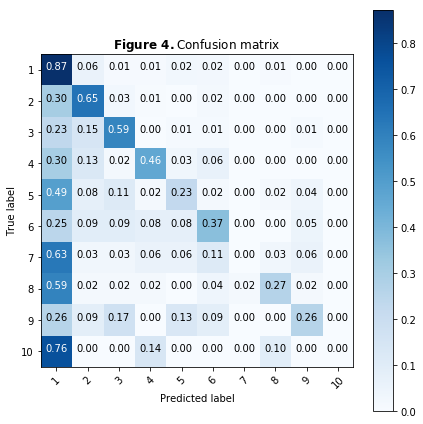

In [13]:
rythym = np.concatenate((training_data_set[:, :73], training_data_set[:, 74:168]), axis=1)
chroma = training_data_set[:, 169:216]
mfcc = training_data_set[:, 220:]

scaler_rythym = StandardScaler()
scaler_chroma = StandardScaler()
scaler_mfcc = StandardScaler()

rythym = scaler_rythym.fit_transform(rythym)
chroma = scaler_chroma.fit_transform(chroma)
mfcc = scaler_mfcc.fit_transform(mfcc)

rythym = preprocessing.normalize(rythym, norm='l2')
chroma = preprocessing.normalize(chroma, norm='l2')
mfcc = preprocessing.normalize(mfcc, norm='l2')

training_data_set_log_reg = np.concatenate((rythym, chroma, mfcc), axis=1)

training_data_set_log_reg = np.append(training_data_set_log_reg, genres_labels[:, np.newaxis], 1)

number_of_cols = training_data_set_log_reg.shape[1]
train, test = train_test_split(training_data_set_log_reg, test_size=0.25, random_state=12,
                               stratify=training_data_set_log_reg[:, number_of_cols - 1])
train_x = train[:, :number_of_cols - 1]
train_y = train[:, number_of_cols - 1]

test_x = test[:, :number_of_cols - 1]
test_y = test[:, number_of_cols - 1]

logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=4000, random_state=0, penalty='l2')
logreg.fit(train_x, train_y)

plot_cnf(logreg, test_x, test_y)

If we are to look at the confusion matrix generated by using 75% of the data for training and 25% for validation, we can see the following recall values for each label: 

- __Pop_Rock:__ The recall is 0.87 
- __Electronic:__ The recall is 0.65
- __Rap:__ The recall is 0.59
- __Jazz:__ The recall is 0.46
- __Latin:__ The recall is 0.23 
- __RnB:__ The recall is 0.37
- __International:__ The recall is 0.00 
- __Country:__ The recall is 0.27
- __Reggae:__ The recall is 0.26 
- __Blues:__ The recall is 0.00 

From these numbers, we can see that our classifier was pretty good predicting the labels of Pop_Rock as the recall is the highest at __0.89__. On the other hand, we can see that the classifier was not very good at predicting the labels of International and blues as the recall is of __0.00__. 


In [14]:
scores = cross_val_score(logreg, train_x, train_y, cv=5, scoring='accuracy')
preds = logreg.predict_proba(test_x)
preds = np.argmax(preds, axis=-1)
predictions_on_train = logreg.predict_proba(train_x)
log_loss_score = log_loss(train_y, predictions_on_train, eps=1e-15)
print("Cross val accuracy: ", scores.mean(), scores.std())
print("Train logloss:", log_loss_score)
print('Test Set F-score =  {0:.3f}'.format(f1_score(test_y, preds, average='weighted')))

Cross val accuracy:  0.660164849397 0.0105164263398
Train logloss: 0.862772748947
Test Set F-score =  0.054


## 5. Discussion/Conclusions

For imbalanced multiclass datasets usually, if the accuracy is higher in one case, then the LogLoss should be smaller than that of the other case [5]. For our project results that were stated above: 

- __Case 1__ - Kaggle :  __Accuracy Percentage__ = 0.67345  & __Log Loss__ = 0.16651 
- __Case 2__ -  Testing Data Set : __Accuracy Percentage__ = 0.6601 & __Log Loss__ = 0.86

we can see that the case with the higher accuracy percentage (case 1) does, in fact, have a better accuracy percentage and a smaller log loss.  Accuracy Percentage (case 1) > Accuracy Percentage (case 2) which means that Log Loss (case 1) < Log Loss (case 2). This is indicating that the modelling that we ran for both of these data sets are performing optimally with no issues resulting from the imbalanced multiclass datasets.

Although the Log Loss of case 1 is indeed smaller than that of case 2, the difference in the numbers is significant in comparison to that of the case’s Accuracy Percentage. We can only assume that this is due to the difference in the two algorithms being used to calculate Log Loss. For testing being done locally, we have used the natural log algorithm, where we can assume that kaggle is using log10, thus causing the calculation to be greater.   

Looking further into the numbers of the confusion matrix, we can see that Pop_Rock performed the best and International + Blues performed the worst in prediction. We can assume this is due to the imbalance within the data set, meaning that there were more samples of that of Pop_Rock verses International + Blues for the model to train on.

If we were to have more time to devote to classifying the data, we believe that we could increase the accuracy percentage whilst getting to know the data better. As we focused so much on the features but not so much of the labels (the rows). This would aid in the featuring analysis. We also think that work with SMOTE isn’t over. If we were to use SMOTE for oversampling after removing the outliers from the underrepresented classifiers then perhaps a new matrix could be created about the various sections. Last but not least, perhaps if we could get more data then we could bring Neutral Networks back into play as the sample size would be of a large enough size, in conjunction with diving deeper into more accurate deep learning algorithms.

Based on the knowledge learned from the class, exercises and further research, we believe that the study did, in fact, answer many questions that we had in the beginning with respect to how one can use a training and testing dataset with final feature vectors to find the genre of a song. We understand that our way of thinking and application of the various algorithms could be simplified in a more classified and straightforward way, but with the constraints that were given (time, exercise garage frequency and exams) we are proud of our work and are pleasantly surprised on the level of accuracy and log loss we were able to achieve. 


## 6. References

[1] http://theinstitute.ieee.org/technology-topics/big-data/how-machine-learning-is-reinventing-the-way-we-discover-music 

[2]  https://medium.com/s/story/spotifys-discover-weekly-how-machine-learning-finds-Your-new-music-19a41ab76efe 

[3] https://medium.com/@saeedAR/smote-and-near-miss-in-python-machine-learning-in-imbalanced-datasets-b7976d9a7a79 

[4] https://sebastianraschka.com/Articles/2014_about_feature_scaling.html

[5] https://sci2s.ugr.es/imbalanced

## Appendix

### Results achieved with K-Nearest Neighbor

In [41]:
best_k = 26
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(train_x, train_y)
scores = cross_val_score(knn, train_x, train_y, cv=5, scoring='accuracy')
print("Cross val accuracy: ", scores.mean(), scores.std())
preds = knn.predict_proba(test_x)
preds = np.argmax(preds, axis=-1)
print('Test Set F-score =  {0:.3f}'.format(f1_score(test_y, preds, average='weighted')))
predictions_on_train = knn.predict_proba(train_x)
log_loss_score = log_loss(train_y, predictions_on_train, eps=1e-15)
print("Train logloss:", log_loss_score)

Cross val accuracy:  0.602381410671 0.0135211170253
Test Set F-score =  0.033
Train logloss: 1.04008908622


### Results achieved with Neural Network

In [43]:
# This takes long to compute!
neural = MLPClassifier(max_iter=400, random_state=2, hidden_layer_sizes=[40, 40])
neural.fit(train_x, train_y)
scores = cross_val_score(neural, train_x, train_y, cv=5, scoring='accuracy')
print("Cross val accuracy: ", scores.mean(), scores.std())
preds = neural.predict_proba(test_x)
preds = np.argmax(preds, axis=-1)
print('Test Set F-score =  {0:.3f}'.format(f1_score(test_y, preds, average='weighted')))
predictions_on_train = neural.predict_proba(train_x)
log_loss_score = log_loss(train_y, predictions_on_train, eps=1e-15)
print("Train logloss:", log_loss_score)

Cross val accuracy:  0.603888516797 0.00838899588949
Test Set F-score =  0.104
Train logloss: 0.00432656772461
